# Taller Pandas Data Frame
---------------------

### NumPy:
* Low Level Data Structure (np.array)
* Suport large multi-dimensional array and matrices
* Soporte a muchas operaciones matematicas </q>

### Pandas:
* Structuras de datos de alto nivel (DataFrames)
* Opreraciones de agregacion, merge and join
* Manejo de Series

![title](ThePythonStack.png)

In [104]:
#from IPython.display import IFrame
#IFrame("Pandas_Cheat_Sheet.pdf", width=900, height=800)

-----------------------
### Importamos las librerias para trabajar

In [105]:
import numpy as np
import pandas as pd

## Empezando con Array y Series

In [106]:
l1 = [1,2,3]

In [107]:
type(l1)

list

In [108]:
l1 = [1,2,3]
l2 = [2,3,4]
l1 + l2

[1, 2, 3, 2, 3, 4]

In [109]:
miarray = np.array([
                    [1,2,3,5,7],
                    [4,3,2,1,0],
                    [12,43,32,54,98]
                   ])
miarray.shape

(3, 5)

In [110]:
miarray.size

15

In [111]:
miarray + miarray

array([[  2,   4,   6,  10,  14],
       [  8,   6,   4,   2,   0],
       [ 24,  86,  64, 108, 196]])

In [112]:
miarray[0:-1:1,0:-2]

array([[1, 2, 3],
       [4, 3, 2]])

In [113]:
#miserie = pd.Series([1,2,3], index = ['a', 'b', 'c'])
miserie = pd.Series([1,2,3])
#miserie.isin(['1'])

In [114]:
miserie[0:3]

0    1
1    2
2    3
dtype: int64

In [115]:
miserie + miserie

0    2
1    4
2    6
dtype: int64

In [116]:
a1 = np.array([1,2,3])
a2 = np.array([1,2,3])


In [117]:
l2 + a1

array([3, 5, 7])

## Construccion de Data Frames

In [118]:
[['a',1,'&'], ['b',2,'/'], ['c',3,'@']]

[['a', 1, '&'], ['b', 2, '/'], ['c', 3, '@']]

In [119]:
#df = pd.DataFrame([['a',1,'&'], ['b',2,'/'], ['c',3,'@']], columns = ['Col1', 'Col2', 'Col3'], index = ['K1', 'K2', 'K3'])
df = pd.DataFrame([
                    [1,2,3,5,7],
                    [4,3,2,1,0],
                    [12,43,32,54,98]
                   ])
df

,0,1,2,3,4
0,1,2,3,5,7
1,4,3,2,1,0
2,12,43,32,54,98


### Contruccioon con diccionario

In [120]:
d = { 'Col1': ['a', 'b', 'c'], 
      'Col2': [1, 2, 3], 
      'Col3' : ['1971/01/01', '2000/08/25', '2019/05/2']
    }
d

{'Col1': ['a', 'b', 'c'],
 'Col2': [1, 2, 3],
 'Col3': ['1971/01/01', '2000/08/25', '2019/05/2']}

In [121]:
#df = pd.DataFrame(d, index = ['I1', 'I2', 'I3'])
df = pd.DataFrame(d)
df

,Col1,Col2,Col3
0,a,1,1971/01/01
1,b,2,2000/08/25
2,c,3,2019/05/2


In [122]:
df.dtypes

Col1    object
Col2     int64
Col3    object
dtype: object

In [123]:
pd.to_datetime(df.Col3)

0   1971-01-01
1   2000-08-25
2   2019-05-02
Name: Col3, dtype: datetime64[ns]

In [124]:
df.Col3 = pd.to_datetime(df.Col3)

In [125]:
df.dtypes

Col1            object
Col2             int64
Col3    datetime64[ns]
dtype: object

In [126]:
df

,Col1,Col2,Col3
0,a,1,1971-01-01
1,b,2,2000-08-25
2,c,3,2019-05-02


### Leyendo de Archivos

In [129]:
!type data\Personas.csv

CI,Nombre,Sexo,Telefono,FNac
35874773, Rafael Harispe, M, 09552992, 1971/02/05


In [131]:
dfPersonas = pd.read_csv('data/Personas.csv', parse_dates = ['FNac'])
#dfPersonas = pd.read_csv('Personas.csv', sep = ',', )
dfPersonas

,CI,Nombre,Sexo,Telefono,FNac
0,35874773,Rafael Harispe,M,9552992,1971-02-05


In [132]:
dfPersonas

,CI,Nombre,Sexo,Telefono,FNac
0,35874773,Rafael Harispe,M,9552992,1971-02-05


In [134]:
!type data\MasPersonas.csv

CI,Nombre,Sexo,Telefono,FNac
17477171,Silvana Collazo,F,00000000,1980/01/01
35874773,Rafael Harispe,M,09552992,1971/02/05
1231233,,,099998898,


In [135]:
dfMasPersonas = pd.read_csv('data/MasPersonas.csv', parse_dates = ['FNac'])
dfMasPersonas

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,NaN,NaN,99998898,NaT


In [136]:
dfAll = pd.concat([dfPersonas, dfMasPersonas])

In [137]:
dfAll.set_index('CI')

,Nombre,Sexo,Telefono,FNac
CI,,,,
35874773,Rafael Harispe,M,9552992,1971-02-05
17477171,Silvana Collazo,F,0,1980-01-01
35874773,Rafael Harispe,M,9552992,1971-02-05
1231233,NaN,NaN,99998898,NaT


## Leyendo de Excel

In [139]:
pd.read_clipboard()

,NroSiniestro,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
0,102030,35874773,15/1/2019,M,150000,150000
1,453242,17477171,3/7/2019,R,10000,500
2,123123,35874773,15/1/2019,M,150000,150001


In [140]:
dfP = pd.read_excel('data/Personas.xlsx', sheet_name = 'Hoja1')
dfP

,Nombre,Apellido,Direccion,Telefono
0,Rafael,Harispe,Verdi 4622,95529992


In [141]:
dfAll.to_clipboard(sep = ';')

## Explorando el Data Frame

In [142]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [143]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [144]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [145]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [146]:
movies.genre.value_counts(normalize = True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [147]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [148]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [149]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [150]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


## Pandas Profiling

In [152]:
#!pip install pandas-profiling

In [153]:
import pandas_profiling

In [154]:
#report = pandas_profiling.ProfileReport(movies)

In [155]:
# Para explorer
#from IPython.core.display import display, HTML
#display(HTML(report.to_html()))

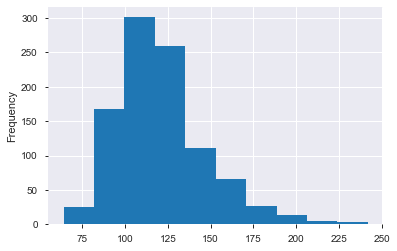

In [156]:
%matplotlib inline
movies.duration.plot(kind = 'hist')

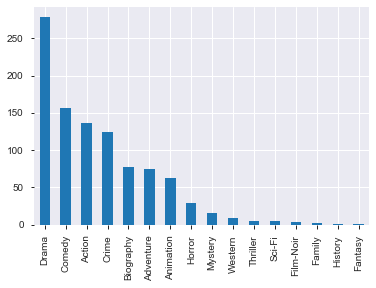

In [157]:
movies.genre.value_counts().plot(kind = 'bar')

## Explorando el Data Frame

### Operador []

In [158]:
## Columnas como atributos
df.Col1

0    a
1    b
2    c
Name: Col1, dtype: object

In [159]:
## Operador de acceso [] con lista de strings, espera una lista de columnas
df['Col1']

0    a
1    b
2    c
Name: Col1, dtype: object

In [160]:
df[['Col1','Col3']]

,Col1,Col3
0,a,1971-01-01
1,b,2000-08-25
2,c,2019-05-02


In [181]:
## Opoerador de acceso [] con sintaxis ::
## Espera indices de filas desde:hasta:salto
df.set_index([pd.Series(['I1', 'I2', 'I3'])], inplace = True)
df.loc['I1':'I3',:]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I2,b,2,2000-08-25
I3,c,3,2019-05-02


In [182]:
## Opoerador de acceso [] con sintaxis ::
## Espera indices de filas desde:hasta:salto
df[:-1:2]

,Col1,Col2,Col3
I1,a,1,1971-01-01


In [183]:
## Operador [] con array de boleanos
## Será especialmente util en busquedas
df[[True, False, True]]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I3,c,3,2019-05-02


#### Trabajando con loc

In [184]:
df.loc['I1', 'Col2']

1

In [185]:
df.loc[['I1', 'I2'], 'Col2']

I1    1
I2    2
Name: Col2, dtype: int64

In [188]:
df.loc['I1': 'I3', :]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I2,b,2,2000-08-25
I3,c,3,2019-05-02


In [189]:
df[['Col1', 'Col2']]

,Col1,Col2
I1,a,1
I2,b,2
I3,c,3


### Trabajando con iloc

In [190]:
df.iloc[[0,2] , [0, 2]]

,Col1,Col3
I1,a,1971-01-01
I3,c,2019-05-02


### Buscando den Data Frames

In [191]:
df.Col1 == 'a'

I1     True
I2    False
I3    False
Name: Col1, dtype: bool

In [192]:
df

,Col1,Col2,Col3
I1,a,1,1971-01-01
I2,b,2,2000-08-25
I3,c,3,2019-05-02


In [193]:
df[df.Col2 == 2]

,Col1,Col2,Col3
I2,b,2,2000-08-25


In [194]:
df[(df.Col1 == 'a') | (df.Col2 == 3)]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I3,c,3,2019-05-02


In [195]:
df.Col1.isin(['a', 'b'])

I1     True
I2     True
I3    False
Name: Col1, dtype: bool

In [196]:
df[df.Col1.isin(['a', 'b'])]

,Col1,Col2,Col3
I1,a,1,1971-01-01
I2,b,2,2000-08-25


In [197]:
df[df.Col2 >= 2]

,Col1,Col2,Col3
I2,b,2,2000-08-25
I3,c,3,2019-05-02


In [198]:
## Agregar Columnas
df['Col4'] = df.Col2 * 10

In [199]:
df

,Col1,Col2,Col3,Col4
I1,a,1,1971-01-01,10
I2,b,2,2000-08-25,20
I3,c,3,2019-05-02,30


In [200]:
df.iloc[0, 3] = 100

## Llenar datos faltantes

In [201]:
dfFNA = pd.read_csv('data/MasPersonas.csv', parse_dates = ['FNac'])
dfFNA

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,NaN,NaN,99998898,NaT


In [202]:
dfFNA.fillna({ 'Nombre':'notiene@notiene', 'Sexo':'?', 'FNac': np.datetime64('1970-01-01')})

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,notiene@notiene,?,99998898,1970-01-01


In [203]:
dfFNA.fillna({ 'Nombre':'notiene@notiene', 'Sexo':'?', 'FNac': dfFNA.FNac.min()})

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,notiene@notiene,?,99998898,1971-02-05


In [204]:
dfFNA.fillna(method = 'ffill')

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,Rafael Harispe,M,99998898,1971-02-05


In [205]:
dfFNA.interpolate()

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05
2,1231233,NaN,NaN,99998898,NaT


In [206]:
dfFNA.dropna()

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980-01-01
1,35874773,Rafael Harispe,M,9552992,1971-02-05


In [207]:
s = pd.Series([1,2,np.nan,4])
s

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [208]:
s.interpolate()

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

## Extras

In [209]:
rows, cols = df.shape

In [210]:
rows,cols

(3, 4)

In [211]:
df.head()
df.tail(2)

,Col1,Col2,Col3,Col4
I2,b,2,2000-08-25,20
I3,c,3,2019-05-02,30


In [212]:
df.columns

Index(['Col1', 'Col2', 'Col3', 'Col4'], dtype='object')

In [213]:
df.values

array([['a', 1, Timestamp('1971-01-01 00:00:00'), 100],
       ['b', 2, Timestamp('2000-08-25 00:00:00'), 20],
       ['c', 3, Timestamp('2019-05-02 00:00:00'), 30]], dtype=object)

In [214]:
df.index

Index(['I1', 'I2', 'I3'], dtype='object')

In [215]:
df.describe()

,Col2,Col4
count,3.0,3.000000
mean,2.0,50.000000
std,1.0,43.588989
min,1.0,20.000000
25%,1.5,25.000000
50%,2.0,30.000000
75%,2.5,65.000000
max,3.0,100.000000


In [216]:
df.dtypes

Col1            object
Col2             int64
Col3    datetime64[ns]
Col4             int64
dtype: object

In [217]:
df.sort_values('Col3', ascending = False)

,Col1,Col2,Col3,Col4
I3,c,3,2019-05-02,30
I2,b,2,2000-08-25,20
I1,a,1,1971-01-01,100


In [218]:
## Renombrando Columnas
df.rename(columns = {'Col1':'Columna1', 'Col4': 'Columna4'})

,Columna1,Col2,Col3,Columna4
I1,a,1,1971-01-01,100
I2,b,2,2000-08-25,20
I3,c,3,2019-05-02,30


In [219]:
## Iterando las filas
for index, row in df.iterrows():
    print(index)
    print(row)

I1
Col1                      a
Col2                      1
Col3    1971-01-01 00:00:00
Col4                    100
Name: I1, dtype: object
I2
Col1                      b
Col2                      2
Col3    2000-08-25 00:00:00
Col4                     20
Name: I2, dtype: object
I3
Col1                      c
Col2                      3
Col3    2019-05-02 00:00:00
Col4                     30
Name: I3, dtype: object


In [220]:
## Guardar CSV
df.to_csv('salida.csv')

In [221]:
data = np.random.randn(40, 4)
df1 = pd.DataFrame(data,
                    columns=list('ABCD'),
                    index=pd.date_range('20130101', periods=40, freq='W'))
df1.head()

,A,B,C,D
2013-01-06,1.821825,0.550681,1.910090,2.117985
2013-01-13,-1.415188,1.055157,-0.713523,-0.658412
2013-01-20,2.030916,0.988724,-0.579934,0.637019
2013-01-27,-1.525287,0.158451,-0.494767,2.256831
2013-02-03,0.277828,-2.041899,-1.799541,-1.294141


In [222]:
df1['20130101':'20130131']

,A,B,C,D
2013-01-06,1.821825,0.550681,1.910090,2.117985
2013-01-13,-1.415188,1.055157,-0.713523,-0.658412
2013-01-20,2.030916,0.988724,-0.579934,0.637019
2013-01-27,-1.525287,0.158451,-0.494767,2.256831


In [223]:
## Lectura desde una url
df1 = pd.read_csv("http://pythonhow.com/data/income_data.csv")

In [224]:
df1.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,45339.800000,46680.600000,49789.800000,50395.800000,47999.00000,47709.400000,48662.200000,50038.800000,50113.400000
std,8586.880615,9195.672966,9415.639633,9906.997487,10630.62477,8303.656201,6893.345538,10094.581873,9446.102122
min,36658.000000,37057.000000,40795.000000,39586.000000,36538.00000,38587.000000,41302.000000,39018.000000,39919.000000
25%,37150.000000,37952.000000,42212.000000,44476.000000,39980.00000,40933.000000,42590.000000,43464.000000,41381.000000
50%,45245.000000,46657.000000,47215.000000,46914.000000,45739.00000,46896.000000,48621.000000,47044.000000,50602.000000
75%,51755.000000,55319.000000,55734.000000,57014.000000,56134.00000,54283.000000,53367.000000,57020.000000,57528.000000
max,55891.000000,56418.000000,62993.000000,63989.000000,61604.00000,57848.000000,57431.000000,63648.000000,61137.000000


In [225]:
df1.shape

(5, 11)

In [226]:
## Variables categoricas
dfC = pd.DataFrame({'ID':[100,200,300,400], 'Calidad':['Buena', 'Media', 'Mala', 'Regular']})

In [227]:
dfC.sort_values('Calidad')

,ID,Calidad
0,100,Buena
2,300,Mala
1,200,Media
3,400,Regular


In [228]:
dfC.memory_usage(deep = True)

Index      128
ID          32
Calidad    249
dtype: int64

In [229]:
dfC['Calidad'] = dfC['Calidad'].astype('category')

In [230]:
dfC.memory_usage(deep = True)

Index      128
ID          32
Calidad    413
dtype: int64

In [231]:
from pandas.api.types import CategoricalDtype
#dfC['Calidad'] = dfC.Calidad.astype('category', categories = ['Mala', 'Regular', 'Media', 'Buena'], ordered = True)
dfC['Calidad'] = dfC.Calidad.astype(CategoricalDtype(['Mala', 'Regular', 'Media', 'Buena'], ordered = True))

In [232]:
dfC.sort_values('Calidad')

,ID,Calidad
2,300,Mala
3,400,Regular
1,200,Media
0,100,Buena


In [233]:
dfC[dfC.Calidad < 'Media']

,ID,Calidad
2,300,Mala
3,400,Regular


## Leyendo multipleas archivos

In [234]:
from glob import glob

In [237]:
archivos = glob('data/*Personas*.csv')
archivos

['data\\MasPersonas.csv', 'data\\Personas.csv']

In [238]:
pd.concat((pd.read_csv(file) for file in archivos))

,CI,Nombre,Sexo,Telefono,FNac
0,17477171,Silvana Collazo,F,0,1980/01/01
1,35874773,Rafael Harispe,M,9552992,1971/02/05
2,1231233,NaN,NaN,99998898,NaN
0,35874773,Rafael Harispe,M,9552992,1971/02/05


## Leyendo clipboard

In [241]:
cbDF = pd.read_clipboard()
cbDF

,NroSiniestro,NroCliente,FechaDeclaracion,TipoSiniestro,MontoReclamado,MontoPago
0,102030,35874773,15/1/2019,M,150000,150000
1,453242,17477171,3/7/2019,R,10000,500
2,123123,35874773,15/1/2019,M,150000,150001


In [243]:
#cbDF.to_clipboard(sep = ',')

In [244]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [245]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [246]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [247]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [248]:
movies.genre.value_counts(normalize = True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [249]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [250]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [251]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

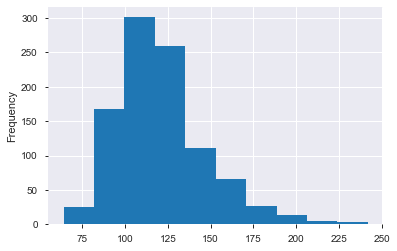

In [252]:
%matplotlib inline
movies.duration.plot(kind = 'hist')

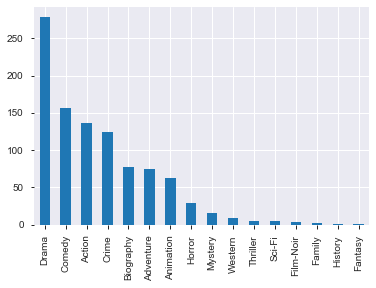

In [253]:
movies.genre.value_counts().plot(kind = 'bar')

### Funciones de agregacion

In [254]:
df1['2005'].agg(['max', 'min', 'mean'])

max     55891.0
min     36658.0
mean    45339.8
Name: 2005, dtype: float64

In [255]:
df1.max()

GEOID     04000US06
State    California
2005          55891
2006          56418
2007          62993
2008          63989
2009          61604
2010          57848
2011          57431
2012          63648
2013          61137
dtype: object

In [256]:
df1.agg(['max', 'min', 'std', 'mean'])

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013
max,04000US06,California,55891.000000,56418.000000,62993.000000,63989.000000,61604.00000,57848.000000,57431.000000,63648.000000,61137.000000
min,04000US01,Alabama,36658.000000,37057.000000,40795.000000,39586.000000,36538.00000,38587.000000,41302.000000,39018.000000,39919.000000
std,NaN,NaN,8586.880615,9195.672966,9415.639633,9906.997487,10630.62477,8303.656201,6893.345538,10094.581873,9446.102122
mean,NaN,NaN,45339.800000,46680.600000,49789.800000,50395.800000,47999.00000,47709.400000,48662.200000,50038.800000,50113.400000


In [257]:
df1.std()

2005     8586.880615
2006     9195.672966
2007     9415.639633
2008     9906.997487
2009    10630.624770
2010     8303.656201
2011     6893.345538
2012    10094.581873
2013     9446.102122
dtype: float64

In [258]:
df1.std(axis = 1)

0    2431.817125
1    3218.830188
2    1582.760546
3    1765.581522
4    1905.890678
dtype: float64

In [259]:
df1['Suma Total'] = df1.sum(axis = 1)

In [260]:
df1

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,04000US01,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
1,04000US02,Alaska,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
2,04000US04,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,04000US05,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,04000US06,California,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [261]:
df1['2005'].idxmin()

3

In [262]:
df1.loc[df1['2005'].idxmin(),]

GEOID         04000US05
State          Arkansas
2005              36658
2006              37057
2007              40795
2008              39586
2009              36538
2010              38587
2011              41302
2012              39018
2013              39919
Suma Total       349460
Name: 3, dtype: object

In [263]:
df1[df1['2005'] < df1['2005'].max() - 10]

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,04000US01,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
2,04000US04,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,04000US05,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,04000US06,California,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [264]:
df1

,GEOID,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,04000US01,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
1,04000US02,Alaska,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
2,04000US04,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,04000US05,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,04000US06,California,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [265]:
df1.iloc[:,2:]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
0,37150,37952,42212,44476,39980,40933,42590,43464,41381,370138
1,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
2,45245,46657,47215,46914,45739,46896,48621,47044,50602,424933
3,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
4,51755,55319,55734,57014,56134,54283,53367,57020,57528,498154


In [266]:
def f(x):
    return x.max()

df1.iloc[:,2:].agg(['sum','max','min', lambda s: s[s>40000].count()])

,2005,2006,2007,2008,2009,2010,2011,2012,2013,Suma Total
sum,226699,233403,248949,251979,239995,238547,243311,250194,250567,2183644
max,55891,56418,62993,63989,61604,57848,57431,63648,61137,540959
min,36658,37057,40795,39586,36538,38587,41302,39018,39919,349460
<lambda>,3,3,5,4,3,4,5,4,4,5


In [267]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [268]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [269]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [270]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [271]:
movies.genre.value_counts(normalize = True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [272]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [273]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [274]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

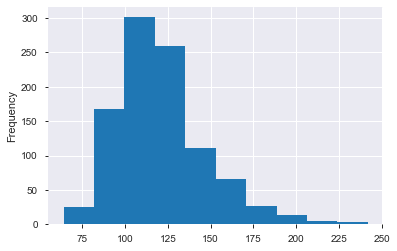

In [275]:
%matplotlib inline
movies.duration.plot(kind = 'hist')

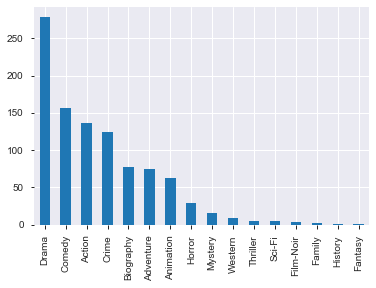

In [276]:
movies.genre.value_counts().plot(kind = 'bar')

# Graficando DataFrames

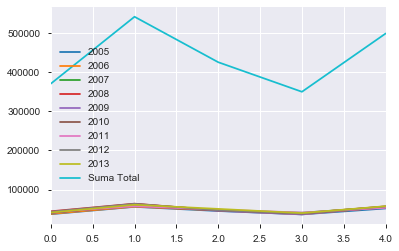

In [277]:
df1.plot()

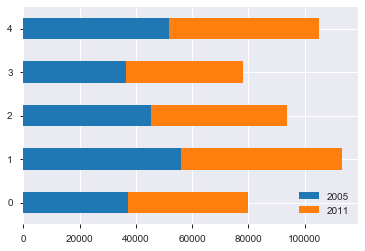

In [278]:
df1[['2005', '2011']].plot(kind = 'barh', stacked = True)

In [279]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
        'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4

,a,b,c
0,0.471306,-0.066116,-1.055743
1,-0.205732,-0.074314,-0.551908
2,0.520853,-0.928404,-1.243147
3,0.347570,0.396560,-1.275304
4,1.179099,0.287869,-1.244229
...,...,...,...
995,1.017175,-0.046760,-2.695270
996,3.292038,0.769685,-1.067348
997,0.746728,0.114957,-2.738989
998,0.070169,-0.071036,-1.987333


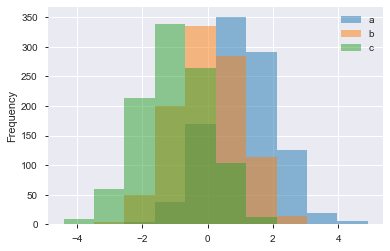

In [280]:
df4.plot(kind='hist', alpha=0.5)

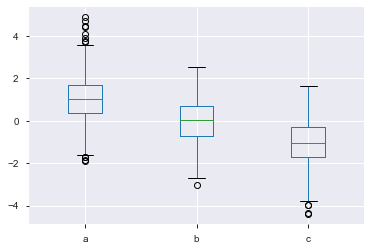

In [281]:
df4.plot(kind='box')

In [282]:
df5 = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])


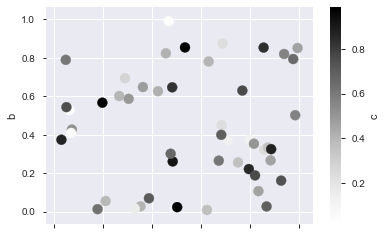

In [283]:
df5.plot(kind='scatter', x='a', y='b', c = 'c', s = 100);

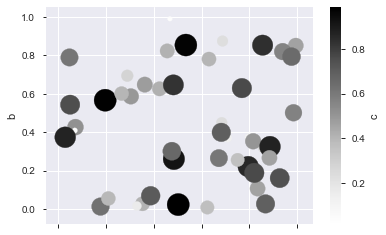

In [284]:
df5.plot(kind='scatter', x='a', y='b', c = 'c', s = df5['c']*500)